In [1]:
%pip install pandas numpy matplotlib plotly seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [3]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [10]:
data['sex'].replace('female', 0, inplace=True)
data['sex'].replace('male', 1, inplace=True)
data['sex']=data['sex'].astype('int64')

In [9]:
data['smoker'].replace('no', 0, inplace=True)
data['smoker'].replace('yes', 1, inplace=True)
data['smoker']=data['smoker'].astype('int64')

In [12]:
region = pd.get_dummies(data['region'], prefix='region', dtype=int)
region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [14]:
X = pd.concat([data[['age', 'sex', 'bmi', 'children', 'smoker']], region], axis = 1) # зависимые переменные, прогнозированные, y целевая переменная
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


In [15]:
y=data['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

In [25]:
def mse(X,y,vec):
    p=len(y)
    ms=(1./p)*np.sum((X.dot(vec)-y)**2) # нормализация переменных = мартрица умноженная скалярно на вектор матрицы
    return ms
def grad(X,y,learn,i):
    X = np.hstack((np.ones((X.shape[0], 1)), X)) 
    params = np.random.rand(X.shape[1]) # ввод значений весов w1,w2
    m = X.shape[0]
    
    cost_track = np.zeros((i, 1)) # отслеживает фун-ции
    
    for i in range(i):
        params = params - (2./m * learn * np.dot(X.T, (np.dot(X, params) - y)))
        cost_track[i] = mse(X, y, params)
    
    return cost_track, params
    

In [32]:
def predict(X,params):
    X=np.hstack((np.ones((X.shape[0], 1)), X))
    np.dot(X,params)
    return np.dot(X,params)

In [33]:
teack, weights = grad(X_train, y_train, 0.0003, 100000)

print(weights)

# Provide the weights as the 'params' argument when calling predict()
y_pred = predict(X_test, weights)
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

[-9.46175049e+03  2.53832808e+02  9.57012978e-01  3.24357436e+02
  3.61120612e+02  2.25170884e+04 -1.52633964e+03 -2.50783529e+03
 -2.08846982e+03 -3.33700528e+03]
R-squared score: 0.7569238596041687


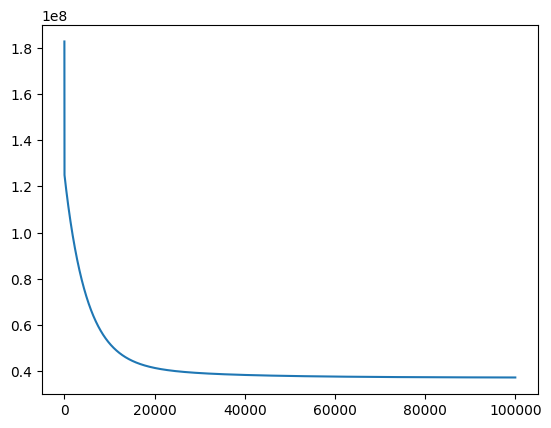

In [34]:
plt.plot(teack)